## Data Analysis with pandas

Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

### Task 1 - Load Data

- Read about the [data set](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015)
- Read in the data to pandas
- Check the shape of the dataframe and examine the different columns
- Check the summary statistics of the dataframe

In [102]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
tgiving = pd.read_csv("thanksgiving.csv", encoding='Latin-1')

In [104]:
print(tgiving.shape)
tgiving.info()

(1058, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 65 columns):
RespondentID                                                                                                                                    1058 non-null int64
Do you celebrate Thanksgiving?                                                                                                                  1058 non-null object
What is typically the main dish at your Thanksgiving dinner?                                                                                    974 non-null object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)                                                           35 non-null object
How is the main dish typically cooked?                                                                                                          974 non-null object
How is the main dish typically cooked? - Other (please specify

### Task 2 - Initial Data Analysis

- Create a new dataframe that only includes people that celebrate Thanksgiving
- Find out what the most popular main dish is.
- Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
- What is the most popular pie?
- How many pies are eaten other than Apple, Pecan and Pumpkin?
- Look at the age distribution.
- Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the age column now.
- Look at the income distribution.
- Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the income column now.
- Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
- Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.


In [105]:
americans = tgiving[tgiving["Do you celebrate Thanksgiving?"] == 'Yes']
americans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1057
Data columns (total 65 columns):
RespondentID                                                                                                                                    980 non-null int64
Do you celebrate Thanksgiving?                                                                                                                  980 non-null object
What is typically the main dish at your Thanksgiving dinner?                                                                                    974 non-null object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)                                                           35 non-null object
How is the main dish typically cooked?                                                                                                          974 non-null object
How is the main dish typically cooked? - Other (please specify)             

In [106]:
# gets the max occurring value from the column
americans['What is typically the main dish at your Thanksgiving dinner?'].value_counts().idxmax()

'Turkey'

In [107]:
# filter americans by eaters of tofurkey
tofurkey = americans[americans['What is typically the main dish at your Thanksgiving dinner?'] == 'Tofurkey']

# makes 2 more dataframes that are the number of entries where people answered yes/no to having gravy
no_grav = len(tofurkey[tofurkey['Do you typically have gravy?'] == 'No'])
yes_grav = len(tofurkey[tofurkey['Do you typically have gravy?'] == 'Yes'])

# calculates the percentage of people that like gravy and tofurkey
print("{}% of tofurkey eaters like to have gravy".format(yes_grav/(yes_grav + no_grav) * 100))

60.0% of tofurkey eaters like to have gravy


In [108]:
# creates a new dataframe of pie data so I can avoid having to type out all those names
all_pies = pd.DataFrame(americans.iloc[:,27:40])
pie_count = {}
# creates a dictionary that has the column names as keys and the non-null length of the serises as the values
for column in all_pies:
    pie_count[column] = len(all_pies[column].dropna())

# returns the pie flavor portion of the key that contains the largest non-null column
max(pie_count.keys(), key=(lambda key: pie_count[key]))[99:]

'Pumpkin'

In [109]:
# bad_pie_count is the number of pies that people eat that aren't apple, pecan, and pumpkin
bad_pie_count = 0
column_import = []
for column in all_pies:
    if 'Apple' not in column and 'Pecan' not in column and 'Pumpkin' not in column:
        bad_pie_count += len(all_pies[column].dropna())
print(bad_pie_count)


724


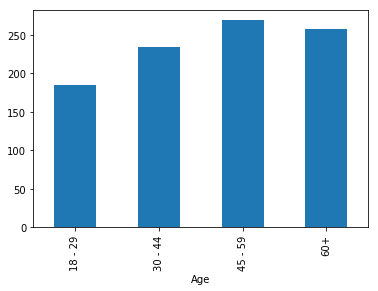

In [110]:
age = americans.groupby("Age")["Age"].count()
age.plot(kind='bar')

In [111]:
# creating a list to later create a list of ints that corresponds to the current string range
mean_dict = {'18 - 29':np.mean([18,29]), '30 - 44':np.mean([30,44]), '45 - 59':np.mean([45,59]), '60+':np.mean([60,85])}
new_age = []

# uses the dictionary above to create a list of corresponding mean ints
for value in americans['Age'].values:
    if isinstance(value, str):
        new_age.append(mean_dict[value])
    else:
        new_age.append(value)
        
# reassigns the age column to the newly created list
new_americans = americans
new_americans['Age'] = pd.Series(new_age)
new_americans['Age'].head()

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    23.5
1    23.5
2    23.5
3    37.0
4    37.0
Name: Age, dtype: float64

Examine the summary statistics of the age column now.

In [112]:
new_americans['Age'].describe()

count    878.000000
mean      48.336560
std       17.805128
min       23.500000
25%       37.000000
50%       52.000000
75%       72.500000
max       72.500000
Name: Age, dtype: float64

Look at the income distribution.

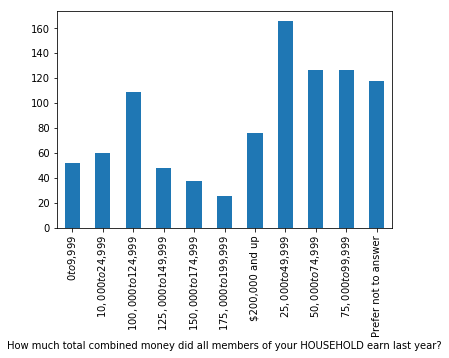

In [113]:
# reassigned the long column title to avoid a very long line for plotting
income = 'How much total combined money did all members of your HOUSEHOLD earn last year?'
new_americans.groupby(income)[income].count().plot(kind='bar')

Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).

In [114]:
# after watching the video, I realize there is an easier way of doing this, but I'll leave this here to better display
# my thought processes. Also I get this SettingWithCopyWarning regardless of weather I'm using .loc/.iloc or not, so I've just been ignoring it
def income_replacement(dataset, income_column):
    dataset.loc[:,income_column].replace('$0 to $9,999', np.mean([0,9999]), inplace=True)
    dataset.loc[:,income_column].replace('$10,000 to $24,999', np.mean([10000,24999]), inplace=True)
    dataset.loc[:,income_column].replace('$100,000 to $124,999', np.mean([100000,124999]), inplace=True)
    dataset.loc[:,income_column].replace('$125,000 to $149,999', np.mean([125000,149999]), inplace=True)
    dataset.loc[:,income_column].replace('$150,000 to $174,999', np.mean([150000,174999]), inplace=True)
    dataset.loc[:,income_column].replace('$175,000 to $199,999', np.mean([175000,199999]), inplace=True)
    dataset.loc[:,income_column].replace('$200,000 and up', np.mean([200000,400000]), inplace=True)
    dataset.loc[:,income_column].replace('$25,000 to $49,999', np.mean([25000,49999]), inplace=True)
    dataset.loc[:,income_column].replace('$50,000 to $74,999', np.mean([50000,74999]), inplace=True)
    dataset.loc[:,income_column].replace('$75,000 to $99,999', np.mean([75000,99999]), inplace=True)
    dataset.loc[:,income_column].replace('Prefer not to answer', np.nan, inplace=True)

income_replacement(new_americans, income)

new_americans[income].head()

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0     87499.5
1     62499.5
2      4999.5
3    300000.0
4    112499.5
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: float64

Examine the summary statistics of the income column now.

In [115]:
new_americans[income].describe()

count       829.000000
mean      95653.948733
std       79102.313789
min        4999.500000
25%       37499.500000
50%       87499.500000
75%      112499.500000
max      300000.000000
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: float64

Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.

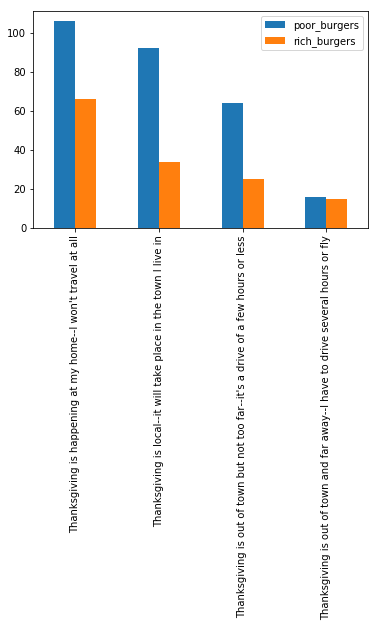

In [116]:
distance = "How far will you travel for Thanksgiving?"

# create new series of distance values where income is less than 50k and more than 150k, respectively
poor_burgers = new_americans[distance][new_americans[income] < 50000].value_counts()
rich_burgers = new_americans[distance][new_americans[income] > 150000].value_counts()

# create a new dataframe from the new series to be able to graph the result easier
distance_traveled = pd.DataFrame({'poor_burgers':poor_burgers, 'rich_burgers':rich_burgers})

#bar plot seems the best for visualization
distance_traveled.plot(kind='bar')

Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.

In [153]:
# column declaration for legibility
hometown = "Have you ever tried to meet up with hometown friends on Thanksgiving night?"
fgiving = "Have you ever attended a \"Friendsgiving?\""

# using the hometown column as an index, and the age and income columns as values for the new pivot table
home_pivot = pd.pivot_table(new_americans, values=['Age', income], index=hometown)

# filtering the pivot table by attendees
home_pivot[home_pivot.index == 'Yes']

,Age,How much total combined money did all members of your HOUSEHOLD earn last year?
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
Yes,48.942724,91077.664062


In [154]:
# using the friendsgiving column as an index, and the age and income columns as values for the new pivot table
fgiving_pivot = pd.pivot_table(new_americans, values=['Age', income], index=fgiving)

#filtering the pivot table by attendees
fgiving_pivot[fgiving_pivot.index == 'Yes']

,Age,How much total combined money did all members of your HOUSEHOLD earn last year?
"Have you ever attended a ""Friendsgiving?""",,
Yes,46.935417,86041.203947


### Task 3 - Visualization

matplotlib
- Use groupby to examine the breakdown of income by type of cranberry sauce
- Use agg to compute the mean and plot the results in a bar chart
- Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
- Choose an appropriate plot or chart to visualize the results

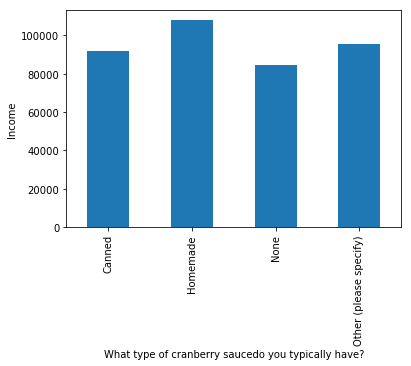

In [74]:
cranberry = "What type of cranberry saucedo you typically have?"

# defining the new cranberry groupby object using the mean of the income column for values
cranberry_inc = new_americans.groupby(cranberry)[income].mean()
plt.ylabel("Income")
cranberry_inc.plot(kind='bar')

Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"

In [79]:
tof = "What is typically the main dish at your Thanksgiving dinner?"

# I'm not entirely sure how to make two filters work in one line, couldn't do it with and or &, so did it in two lines
homemade = new_americans[new_americans[cranberry] == 'Homemade']
homemade_tof = homemade[homemade[tof] == "Tofurkey"]
homemade_tof[income].mean()


57916.166666666664

Choose an appropriate plot or chart to visualize the results

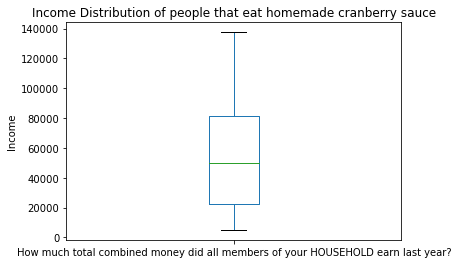

In [86]:
plt.title("Income Distribution of people that eat homemade cranberry sauce")
plt.ylabel("Income")
homemade_tof[income].plot(kind='box')